In [1]:
import gzip
import pickle
import matplotlib.pyplot as plt
import yaml
import io
import os
import numpy as np
np.seterr(all='warn')
import hist
from typing import Any, IO, Dict, List
import dctools
from dctools import plot as plotter
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from scipy import stats as st

In [2]:
from cycler import cycler

all_ch = set([
    'vbs-EM', 
    'vbs-TT', 
    'vbs-NR', 
    'vbs-DY', 
    'vbs-3L', 
    'vbs-SR', 
    'vbs-SR0', 
    'vbs-SR1', 
    'vbs-SR2'])

def plotting(config, variable, channel, rebin=1, xlim=[], blind=False, era="someyear") -> None:
    datasets:Dict = dict()
    color_cycle:List = []
    for name in config.groups:
        histograms = dict(
            filter(
                lambda _n: _n[0] in config.groups[name].processes,
                config.boosthist.items()
            )
        )
        
        p = dctools.datagroup(
            histograms = histograms,
            ptype      = config.groups[name].type,
            observable = variable,
            name       = name,
            xsections  = config.xsections,
            channel    = channel,
            luminosity = config.luminosity.value,
            rebin      = rebin
        )
        
        datasets[p.name] = p
        if p.ptype == "signal":
            signal = p.name
            
        if hasattr(config.groups[name], "color") and len(p.to_boost().shape):
            color_cycle.append(config.groups[name].color)
    
    _plot_channel = plotter.add_process_axis(datasets)
    pred = _plot_channel.project('process', 'systematic', variable)[:hist.loc('data'),:,:]   
    data = _plot_channel[{'systematic':'nominal'}].project('process', variable)[hist.loc('data'),:]
    

    plt.figure(figsize=(6,7))
    ax, bx = plotter.mcplot(
        pred[{'systematic':'nominal'}].stack('process'),
        data=None if blind else data,
        syst=pred.stack('process'),
        colors = color_cycle
    )
    
    ymax = np.max([10000]+[c.get_height() for c in ax.containers[0] if ~np.isnan(c.get_height())])
    ymin = np.min([0.001]+[c.get_height() for c in ax.containers[0] if ~np.isnan(c.get_height())])
    
    ax.set_ylim(0.001, 1000*ymax)
    
    try:
        sig_ewk = _plot_channel[{'systematic':'nominal'}].project('process', variable)[hist.loc('VBSZZ2l2nu'),:]   
        sig_qcd = _plot_channel[{'systematic':'nominal'}].project('process', variable)[hist.loc('ZZ2l2nu'),:]   
        sig_ewk.plot(ax=ax, histtype='step', color='red')
        sig_qcd.plot(ax=ax, histtype='step', color='purple')
    except:
        pass
    # bx.set_ylim([0.1, 1.9])
    if len(xlim) > 0:
        bx.set_xlim(xlim)
        
    ax.set_title(f"channel {channel}: {era}")
    ax.set_yscale('log')
    
    plt.savefig(f'plot-{channel}-{variable}-{era}.pdf')
    plt.savefig(f'plot-{channel}-{variable}-{era}.png')
    return _plot_channel, datasets

In [7]:
config_2016APV = dctools.read_config("config/input_UL_2016APV-amalfi.yaml")
config_2016    = dctools.read_config("config/input_UL_2016-amalfi.yaml")
config_2017    = dctools.read_config("config/input_UL_2017-amalfi.yaml")
config_2018    = dctools.read_config("config/input_UL_2018-amalfi.yaml")

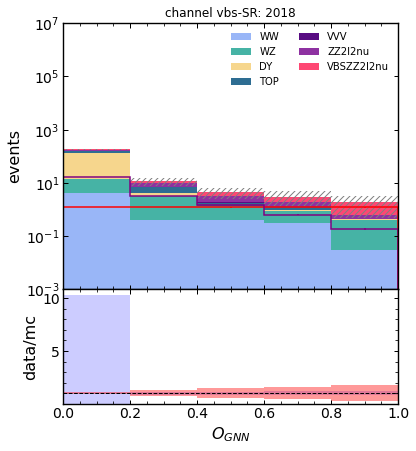

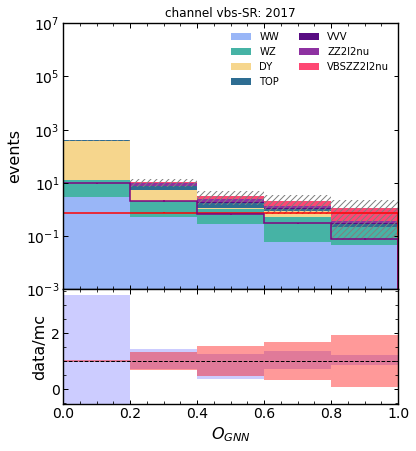

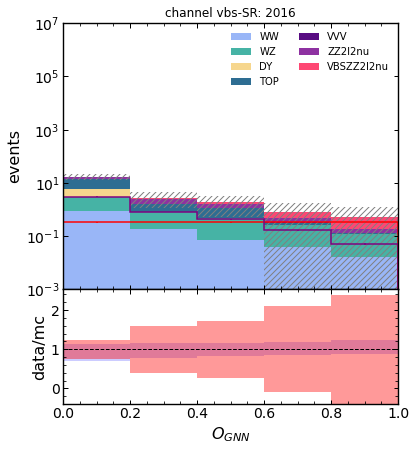

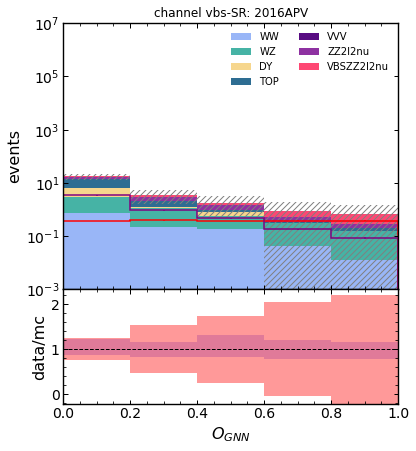

In [8]:
for channel in config_2018.plotting:
    ch_cfg = config_2018.plotting[channel]
    if ('SR' not in channel): continue
    for vname in ch_cfg:
        if 'gnn_flat' not in vname: continue
        v_cfg = ch_cfg[vname]
        plotting(
            config_2018, vname, channel, 
            rebin=v_cfg.rebin, 
            xlim=v_cfg.range, 
            blind=v_cfg.blind,
            era="2018"
        )
        plotting(
            config_2017, vname, channel, 
            rebin=v_cfg.rebin, 
            xlim=v_cfg.range, 
            blind=v_cfg.blind,
            era="2017"
        )
        plotting(
            config_2016, vname, channel, 
            rebin=v_cfg.rebin, 
            xlim=v_cfg.range, 
            blind=v_cfg.blind,
            era="2016"
        )
        plotting(
            config_2016APV, vname, channel, 
            rebin=v_cfg.rebin, 
            xlim=v_cfg.range, 
            blind=v_cfg.blind,
            era="2016APV"
        )

In [27]:
name = "DYJetsToLL_LHEFilterPtZ-100To250_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8"
name = "DYJetsToLL_LHEFilterPtZ-50To100_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8"
name = "WWTo2L2Nu_TuneCP5_13TeV-powheg-pythia8"
h = config_2017.boosthist[name]["hist"]["gnn_flat"]

In [28]:
h[{"channel":"vbs-SR", "systematic":"nominal"}].values(0)

array([549.66,  98.36, 106.49, 112.42, 100.81,   0.  ,  30.82, 145.02,
         0.  ,  21.96,  31.06,   0.  ,   0.  ,  22.13,   0.  ,  27.95,
        22.15,   0.  ,  30.52,   0.  ,   0.  ,  29.97,  32.35,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ])

[1166.  134.   62.    0.    0.] nominal
[1168.  134.   62.    0.    0.] btag_sf_bc_2017Down
[1155.  132.   61.    0.    0.] QCDScale1wDown
[1207.  137.   65.    0.    0.] PDF_weightUp
[1126.  131.   60.    0.    0.] PDF_weightDown
[1166.  134.   62.    0.    0.] aS_weightUp
[1229.  140.   63.    0.    0.] QCDScale0wUp
[1172.  133.   62.    0.    0.] btag_sf_light_2017Down
[1190.  130.   61.    0.    0.] btag_sf_light_2017Up
[1241.  142.   65.    0.    0.] QCDScale2wUp
[1167.  134.   62.    0.    0.] btag_sf_bc_correlatedDown
[1166.  134.   62.    0.    0.] kEWDown
[1147.  132.   61.    0.    0.] triggerSFDown
[1266.  167.   70.    0.    0.] UEPS_ISRDown
[1124.  139.   61.    0.    0.] UEPS_FSRUp
[1175.  135.   64.    0.    0.] QCDScale1wUp
[1164.  134.   62.    0.    0.] btag_sf_bc_correlatedUp
[1088.  111.   57.    0.    0.] UEPS_ISRUp
[1418.  280.   64.    0.    0.] UEPS_FSRDown
[1104.  127.   60.    0.    0.] QCDScale2wDown
[1164.  134.   62.    0.    0.] btag_sf_bc_2017Up
[1188.  1

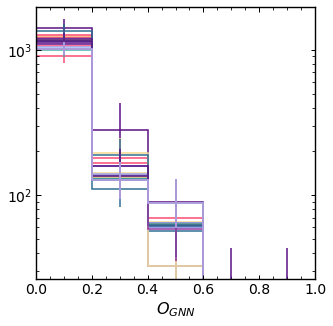

In [29]:
np.set_printoptions(precision=2)
plt.figure(figsize=(5,5))
for s in range(h.axes['systematic'].size):        
    h[{"channel":"vbs-SR", "systematic":h.axes['systematic'].value(s), "gnn_flat": hist.rebin(10)}].plot(histtype='step')
    v = np.array(
        h[{
            "channel":"vbs-SR", 
            "systematic":h.axes['systematic'].value(s), 
            "gnn_flat": hist.rebin(10)
          }].values(0)
    ).astype(np.float64)
    print(np.round(v), h.axes['systematic'].value(s))
plt.xlim([0,1])
plt.yscale('log')